/usr/local/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Shape of y_train: (50000,)
Shape of y_test: (10000,)
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 47ms/step - accuracy: 0.9007 - loss: 0.2999 - val_accuracy: 0.9000 - val_loss: 0.2774
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 47ms/step - accuracy: 0.9005 - loss: 0.2621 - val_accuracy: 0.9007 - val_loss: 0.2516
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 47ms/step - accuracy: 0.9038 - loss: 0.2420 - val_accuracy: 0.9023 - val_loss: 0.2376
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.9042 - loss: 0.2386 - val_accuracy: 0.9027 - val_loss: 0.2458
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 49ms/step - accuracy: 0.9075 - loss: 0.2261 - val_accuracy: 0.9107 - val_loss: 0.2337
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 49ms/step - accuracy: 0.9126 - loss: 0.2166 - val_accuracy: 0.9133 - val_loss: 0.2281
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.9154 - loss: 0.2085 - val_accuracy: 0.9118 - val_loss: 0.2367
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━

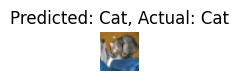

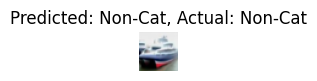

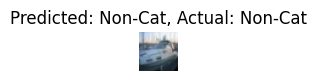

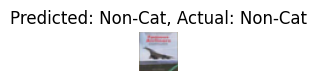

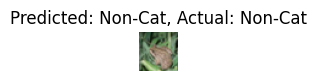

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Load the CIFAR-10 dataset
def load_data():
    """
    Load the CIFAR-10 dataset and select cat (class 3) and non-cat images.
    """
    (X_train, y_train), (X_test, y_test) = cifar10.load_data()
    
    # Convert labels: 1 for cat (class 3), 0 for non-cat (all other classes)
    y_train = (y_train == 3).astype(int)  # Class 3 in CIFAR10 is a cat
    y_test = (y_test == 3).astype(int)
    
    return X_train, y_train, X_test, y_test

# Step 2: Preprocess the data
def preprocess_data(X_train, y_train, X_test, y_test):
    """
    Preprocess the dataset:
    - Normalize the pixel values to be between 0 and 1.
    - Convert the labels to binary (cat vs non-cat).
    """
    # Normalize the pixel values to be between 0 and 1
    X_train = X_train.astype('float32') / 255.0
    X_test = X_test.astype('float32') / 255.0
    
    # One-hot encode the labels for CNN (binary classification: cat vs non-cat)
    y_train = y_train.reshape(-1)  # change it to 1D array to keep shape consistent
    y_test = y_test.reshape(-1)   # change it to 1D array to keep shape consistent
    
    return X_train, y_train, X_test, y_test

# Step 3: Build the CNN model with sigmoid output layer
def build_cnn_model(input_shape):
    """
    Builds and compiles a CNN model for binary image classification (cat vs non-cat).
    """
    model = Sequential()
    
    # First convolutional layer
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D())  # Max pooling
    
    # Second convolutional layer
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D())  # Max pooling
    
    # Flatten the data to pass it into the fully connected layers
    model.add(Flatten())
    
    # Fully connected layer
    model.add(Dense(128, activation='relu'))
    
    # Dropout layer to prevent overfitting
    model.add(Dropout(0.5))
    
    # Output layer with sigmoid activation for binary classification (cat vs non-cat)
    model.add(Dense(1, activation='sigmoid'))  # 1 output neuron for binary classification
    
    # Compile the model with Adam optimizer and binary cross-entropy loss
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Step 4: Train the CNN model
def train_cnn_model(model, X_train, y_train, X_test, y_test, epochs=10, batch_size=64):
    """
    Train the CNN model using the training data and evaluate it on the test data.
    """
    print("Shape of y_train:", y_train.shape)
    print("Shape of y_test:", y_test.shape)
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))
    return model, history

# Step 5: Evaluate the model
def evaluate_model(model, X_test, y_test):
    """
    Evaluate the model performance using accuracy, confusion matrix, and classification report.
    """
    # Evaluate the model's accuracy
    score = model.evaluate(X_test, y_test)
    print(f"Test accuracy: {score[1] * 100:.2f}%")

    # Predictions
    y_pred = model.predict(X_test)
    y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to class labels

    # Classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred_classes))

    # Confusion matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_classes))

    return y_pred_classes

# Step 6: Visualize predictions
def visualize_predictions(X_test, y_test, y_pred_classes):
    """
    Visualize some predictions from the test set.
    """
    for i in range(5):
        plt.figure(figsize=(0.5, 1))  # Increase figure size for better clarity
        plt.imshow(X_test[i])  # Display the image
        plt.title(f"Predicted: {'Cat' if y_pred_classes[i] == 1 else 'Non-Cat'}, Actual: {'Cat' if y_test[i] == 1 else 'Non-Cat'}")
        plt.axis('off')  # Hide the axis for better presentation
        plt.show()

# Main Execution
# Step 1: Load the data
X_train, y_train, X_test, y_test = load_data()

# Step 2: Preprocess the data
X_train, y_train, X_test, y_test = preprocess_data(X_train, y_train, X_test, y_test)

# Step 3: Build the CNN model
input_shape = (32, 32, 3)  # CIFAR-10 images: 32x32 pixels, 3 channels (RGB)
model = build_cnn_model(input_shape)

# Step 4: Train the CNN model
model, history = train_cnn_model(model, X_train, y_train, X_test, y_test, epochs=10, batch_size=80)

# Step 5: Evaluate the model
y_pred_classes = evaluate_model(model, X_test, y_test)

# Step 6: Visualize predictions
visualize_predictions(X_test, y_test, y_pred_classes)
